In [2]:
import matplotlib
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
 
# import some data to play with
iris = datasets.load_iris()
 
# take the first two features
X = iris.data[:, :2]  
y = iris.target
 
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


![Meshgrid](img/meshgrid.png)

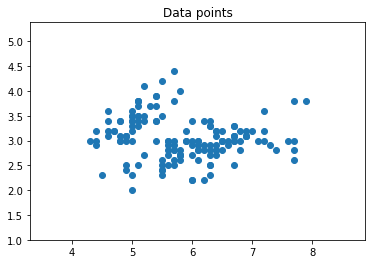

In [3]:
h = .02  # step size in the mesh
 
# Calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
# Put the result into a color plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data points")
plt.show()

In [17]:
# run KNN
n_neighbors=10
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

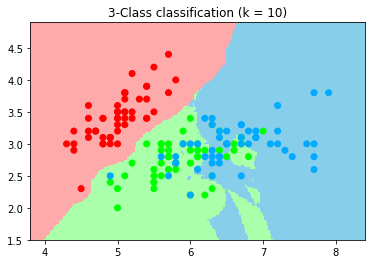

In [18]:
# plot the points
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','skyblue'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

In [6]:
# predict new points
# make prediction
sl = input('Enter sepal length (cm): ')
sw = input('Enter sepal width (cm): ')
dataClass = clf.predict([[sl,sw]])
print('Prediction: '),
 
if dataClass == 0:
    print('Iris Setosa')
elif dataClass == 1:
    print('Iris Versicolour')
else:
    print('Iris Virginica')

Enter sepal length (cm): 21
Enter sepal width (cm): 21
Prediction: 
Iris Virginica


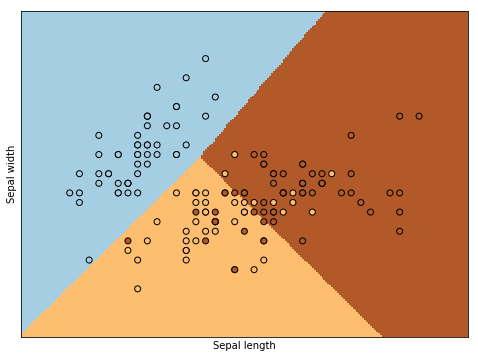

In [19]:
from sklearn import linear_model
# Logistic Regression
logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z_pred = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z_pred.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [20]:
from sklearn.cross_validation import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20,random_state =2)


In [21]:
#NAive Bayes
from sklearn import naive_bayes
from sklearn.metrics import r2_score
gnb = naive_bayes.GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(r2_score(y_test,y_pred))

mnb = naive_bayes.MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb = gnb.predict(x_test)
print(r2_score(y_test,y_pred_mnb))

0.615384615385
0.615384615385


In [22]:
# LDA with svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
y_pred_lda = lda.predict(x_test)
print(r2_score(y_test,y_pred_lda))

0.663461538462


D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [11]:
# Model evaluations
# Print Confusion matrix
from sklearn.metrics import confusion_matrix

# for LDA
cm_lda= confusion_matrix(y_test,y_pred_lda)
print(cm_lda)

# for Naive Bayes
cm_nb = confusion_matrix(y_test,y_pred)
print(cm_nb)
cm_mnb = confusion_matrix(y_test,y_pred_mnb)
print(cm_mnb)

[[13  1  0]
 [ 0  4  4]
 [ 0  2  6]]
[[13  1  0]
 [ 0  4  4]
 [ 0  3  5]]
[[13  1  0]
 [ 0  4  4]
 [ 0  3  5]]


In [12]:
# calculate precision recall, tpr, tfr,f1
from sklearn.metrics import precision_recall_fscore_support

precision, recall,fscore,support = precision_recall_fscore_support(y_test, y_pred, labels =[0,1,2])
print(precision, recall,fscore,support)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,labels=[0,1,2]))

[ 1.          0.5         0.55555556] [ 0.92857143  0.5         0.625     ] [ 0.96296296  0.5         0.58823529] [14  8  8]
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        14
          1       0.50      0.50      0.50         8
          2       0.56      0.62      0.59         8

avg / total       0.75      0.73      0.74        30



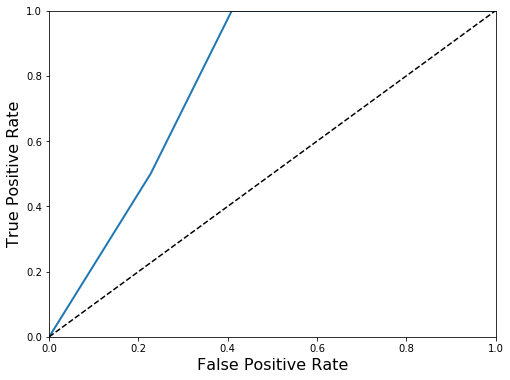

In [13]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()